In [3]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

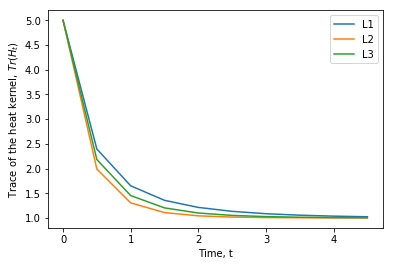

In [11]:
#simulation for the mellin transformed Laplacians for a simple graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])
l_s = []                          #list to capture the mellin tranform set of eigenvalues
T_lst =[]                         #list of trace functions


time = np.arange(0,5,0.5)        #set the time range

s_lst = [1,2,3]                  #set the list for s values
for s in s_lst:
    if s==1:
        l = eigvalsh(nx.laplacian_matrix(G).todense())  #for s =1, use normal laplacianmatrix
    else:
        l = eigvalsh(kplaplacian_mtf(G,s))              #for s!=1, compute mellin transformed eigenvalues
    T = []
    for t in time:
        T.append(np.sum(np.exp(-t*(l))))                #compute trace for the laplacian at time t     
    T_lst.append(T)                                     #append to list of trace values

#plots
for TT in T_lst:
    plt.plot(time,TT, label='L'+str(T_lst.index(TT)+1))

plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

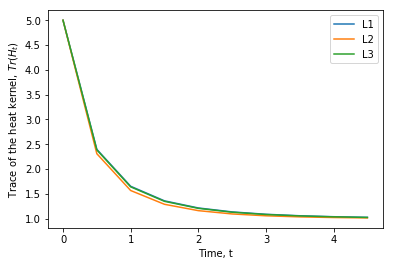

In [14]:
#simulation for the mellin transformed Laplacians for a simple graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])
l_s = []                          #list to capture the laplace tranform set of eigenvalues
T_lst =[]                         #list of trace functions


time = np.arange(0,5,0.5)        #set the time range

lam_lst = [1,1.5,2.5]                  #set the list for s values
for lam in lam_lst:
    if lam==1:
        l = eigvalsh(nx.laplacian_matrix(G).todense())  #for lambda =1, use normal laplacianmatrix
    else:
        l = eigvalsh(kplaplacian_ltf(G,lam))              #for lambda!=1, compute mellin transformed eigenvalues
    T = []
    for t in time:
        T.append(np.sum(np.exp(-t*(l))))                #compute trace for the laplacian at time t     
    T_lst.append(T)                                     #append to list of trace values

#plots
for TT in T_lst:
    plt.plot(time,TT, label='L'+str(T_lst.index(TT)+1))

plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()